# Języki skryptowe w analizie danych -  web scraping
###### dr inż. Marcin Lawnik

# Wytyczne:
1. Lista pracowników:
 1. Pobierz zawartośc strony [https://ms.polsl.pl/kzmimsi/index.php?id=pracownicy](https://ms.polsl.pl/kzmimsi/index.php?id=pracownicy).
 1. Z zawartości wyłuskaj listę pracowników.
 1. Stwórz wykres słupkowy, który przedstawi zestawienie ilości magistrów, doktorów i profesorów w Katedrze. 
 
1. Pobierz automatycznie zawartość pierwszej strony google.com dotyczącą wybranego przez siebie zagadnienia.
 1. **Uwaga** Adres google zawiera każdorazowo następujący prefix `https://www.google.pl/search?q=`.
 
1. Lista publikacji:
 1. Pobierz listę publikacji (tylko tytuły) z [Baza Dorobek](http://www.bg.polsl.pl/expertus/p/) dla dowolnie wybranego pracownika Politechniki Śląskiej. 
 1. Zapisz pobrane dane w pliku tekstowym.
 1. **Uwaga**
 Plik z bazy powinien być zapisany lokalnie (poprzez "zapisz jako"). Do jego otwarcia można użyć funkcji `open()`.  
 
**Uwaga**

Na Platformę Zdalnej Edukacji należy wysłać rozwiązanie co najmniej 1 zestawu. Wysyłamy pliki *ipynb* i *html*.

### Zadanie 1.

In [1]:
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

strona = requests.get("https://ms.polsl.pl/kzmimsi/index.php?id=pracownicy")
soup = BeautifulSoup(strona.content, 'html.parser')
prac= soup.find_all('div', class_='pracownik')
prac_zawartosc = [p.get_text() for p in prac]
print(prac_zawartosc)
dr = 0 
mgr = 0 
prof = 0 
for p in prac:
    if "prof" in str(p):
        prof += 1
    elif 'dr' in str(p):
        dr += 1
    elif 'mgr' in str(p):
        mgr += 1


[' dr Katarzyna Adrianowicz', ' dr inż. Marek Balcer', ' mgr inż. Arkadiusz Banasik', ' prof. dr hab. Mykola Bratiichuk', ' dr inż. Rafał Brociek', ' dr Giacomo Capizzi', ' mgr Agata Chmielowska', ' dr Robertas Damaševičius', ' prof. dr hab. inż. Radosław Grzymkowski', ' dr hab. inż. Edyta Hetmaniok, prof. PŚ', ' dr inż. Konrad Kaczmarek', ' dr inż. Adrian Kapczyński', ' dr inż. Jarosław Karcewicz', ' dr hab. inż. Wojciech Kempa, prof. PŚ', ' mgr Martyna Kobielnik', ' dr inż. Marcin Lawnik', ' dr Ewa Łobos', ' dr Zbigniew Marszałek', ' dr inż. Elwira Mateja-Losa', ' dr hab. Iwona Nowak, prof. PŚ', ' dr inż. Sebastian Pabiasz', ' dr inż. Mariusz Pleszczyński', ' dr inż. Dawid Połap', ' dr hab. inż. Damian Słota, prof. PŚ', ' dr inż. Marcin Sobota', ' dr inż. Zdzisław Sroczyński', ' dr hab. inż. Marcin Woźniak, prof. PŚ', ' dr inż. Adam Zielonka', '\nmgr Hanna Wójtowicz']


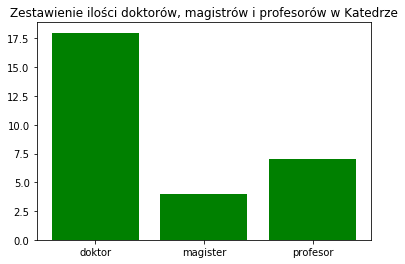

In [2]:
tytuly=['doktor','magister','profesor']
ilosc=[dr, mgr, prof]
plt.bar(tytuly,ilosc, color='g')
plt.title('Zestawienie ilości doktorów, magistrów i profesorów w Katedrze')
plt.show()

### Zadanie 2.

In [3]:
import requests
from bs4 import BeautifulSoup
strona = requests.get("https://www.google.com/search?q=tanie narkotyki")
soup = BeautifulSoup(strona.content, 'html.parser')
soup.find_all('div', {'id': 'main'})

[<div id="main"><div><div class="KP7LCb"> <div class="bRsWnc"> <div class="N6RWV"> <div class="Pg70bf Uv67qb"> <span class="OXXup">Wszystko</span><a class="eZt8xd" href="/search?q=tanie+narkotyki&amp;ie=UTF-8&amp;source=lnms&amp;tbm=nws&amp;sa=X&amp;ved=0ahUKEwjLhZGTzYPpAhVHpYsKHSGhBWYQ_AUICCgB">Wiadomości</a><a class="eZt8xd" href="/search?q=tanie+narkotyki&amp;ie=UTF-8&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwjLhZGTzYPpAhVHpYsKHSGhBWYQ_AUICSgC">Grafika</a><a class="eZt8xd" href="/search?q=tanie+narkotyki&amp;ie=UTF-8&amp;source=lnms&amp;tbm=shop&amp;sa=X&amp;ved=0ahUKEwjLhZGTzYPpAhVHpYsKHSGhBWYQ_AUICigD">Zakupy</a> <a href="https://maps.google.com/maps?q=tanie+narkotyki&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwjLhZGTzYPpAhVHpYsKHSGhBWYQ_AUICygE">Mapy</a> <a href="/search?q=tanie+narkotyki&amp;ie=UTF-8&amp;source=lnms&amp;tbm=vid&amp;sa=X&amp;ved=0ahUKEwjLhZGTzYPpAhVHpYsKHSGhBWYQ_AUIDCgF">Filmy</a> <a href="/search?q=tanie+narkotyki&amp;ie=UTF-8&amp;source=lnms&amp;tb

### Zadanie 3.

In [4]:
import requests
import os, io
from bs4 import BeautifulSoup
f = open(r'C:\Users\Dawid\Desktop\semestr6\jezyki skryptowe w analizie danych\Wyniki wyszukiwania.html','r')
s = f.read()
soup_n = BeautifulSoup(s,"html.parser")
tabela=soup_n.find_all('tbody')
for tr in soup_n.find_all('tbody'):
    td = tr.find_all('td')[3]
    if td:
        print(td)
        g=io.open('tytuly.txt', 'a', os.O_CREAT, encoding="utf-8")
        g.write(td.text)
        g.write('\n')
        g.close()

<td>Arbelos theory in electrical engineering</td>
<td>Hermite-Bell's polynomials for negative powers. </td>
<td>Homotopy approach for integrodifferential equations</td>
<td>On quaternion equivalents for quasi-Fibonacci numbers, shortly Quaternaccis</td>
<td>Quaternaccis - oryginalne ci±gi liczbowe. </td>
<td>Symbolic description of the polynomial roots and their numerical implementation - better than in Mathematica software?. </td>
<td>Symbolic description of the polynomial roots and their numerical implementation - better than in Mathematica software?. </td>
<td>Twierdzenie Oliviera-Abela o asymptotyce zbieżno¶ci elementów szeregów zbieżnych. </td>
<td>Generalizations of arbelos and their applications. </td>
<td>Parametric-vector versions of the Gerschgorin Theorem and the Brauer Theorem. </td>
<td>Twierdzenie Stahla. </td>
<td>Zagadnienia lokalizacyjne warto¶ci własnych macierzy w powi±zaniu z twierdzeniem Gerszgorina. </td>
<td>A chosen form of a block matrix in a mathematical model